# 1. Importing Necessary Libraries

In [58]:
# OS operations
import os  

# Numerical computing
import numpy as np  

# Data manipulation
import pandas as pd  

# Data visualization
import matplotlib.pyplot as plt  
import matplotlib.image as mpimg  
import seaborn as sns  

# Configure default plot size
plt.rcParams["figure.figsize"] = (20,10)  

# Machine Learning - Preprocessing & Model Selection
from sklearn.preprocessing import StandardScaler, LabelEncoder  
from sklearn.model_selection import train_test_split, cross_val_score  

# Machine Learning - Model
import xgboost as xgb  

# 2. Loading the Dataset

In [59]:
# Load the dataset
home = pd.read_csv("Dataset/Bengaluru_House_Data.csv")

# Display the first five rows of the dataset
home.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


# 3. Dataset Information & Structure

In [60]:
# Display dataset information
home.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


# 4. Checking Missing Values (Percentage-wise)

In [61]:
# Calculate the percentage of missing values in each column
round(100 * (home.isnull().sum() / len(home.index)), 2)

area_type        0.00
availability     0.00
location         0.01
size             0.12
society         41.31
total_sqft       0.00
bath             0.55
balcony          4.57
price            0.00
dtype: float64

# 5. Removing Missing Values

In [62]:
# Drop rows with missing values
home.dropna(inplace=True)

# 6. Dropping an Unnecessary Column

In [63]:
# Drop the 'society' column from the dataset
home = home.drop(columns='society')

# 7. Resetting the DataFrame Index

In [64]:
# Reset the index after dropping rows/columns
home.reset_index(drop=True, inplace=True)

# 8. Visualizing the Distribution of area_type

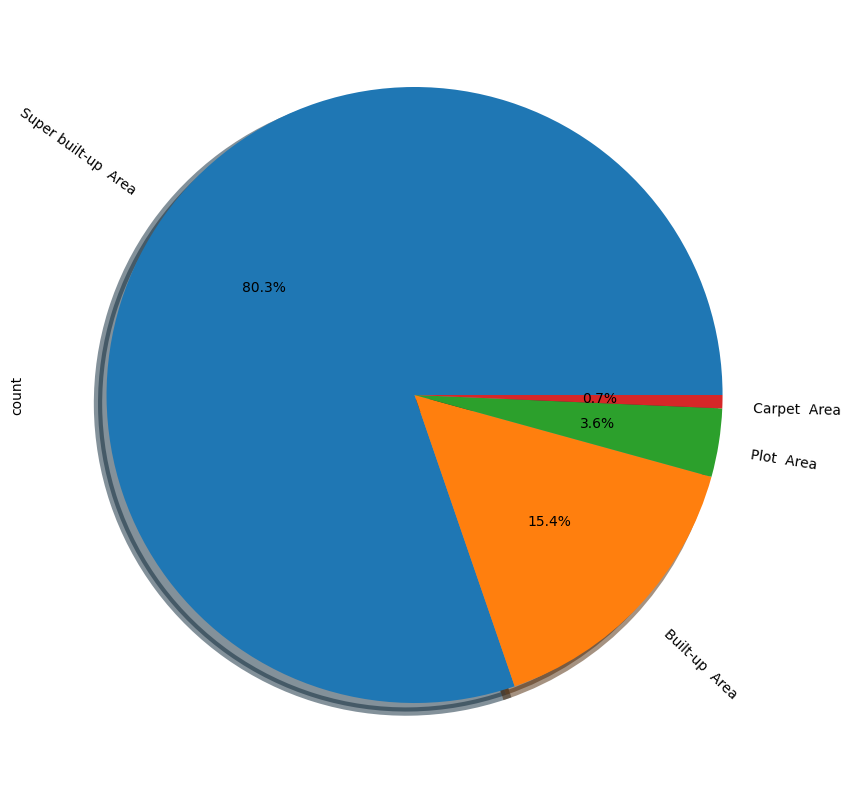

In [65]:
# Plot a pie chart to visualize the distribution of 'area_type'
(home["area_type"].value_counts()).plot.pie(
    autopct="%.1f%%",   # Display percentage on the pie chart
    shadow=True,         # Add shadow to the chart for better aesthetics
    rotatelabels=True,   # Rotate labels to prevent overlap
    wedgeprops={'linewidth': 6},  # Set the thickness of the pie chart slices
    radius=1             # Set the radius of the pie chart
)

# Display the plot
plt.show()

# 10. Distribution of bath by area_type

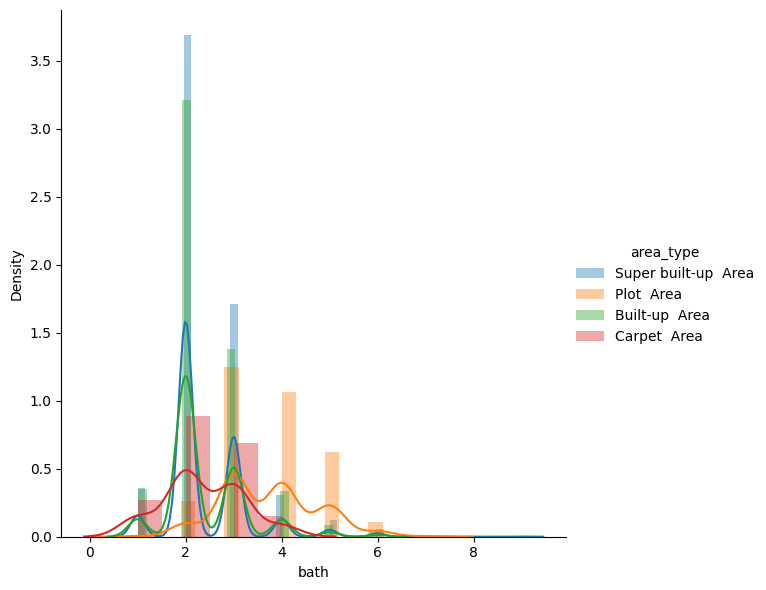

In [66]:
# Ignore warnings for cleaner output
import warnings
warnings.filterwarnings('ignore')

# Create a FacetGrid to visualize the distribution of 'bath' based on 'area_type'
sns.FacetGrid(home, hue='area_type', height=6).map(sns.distplot, 'bath').add_legend()

# Display the plot
plt.show()

# 11. Distribution of balcony by area_type

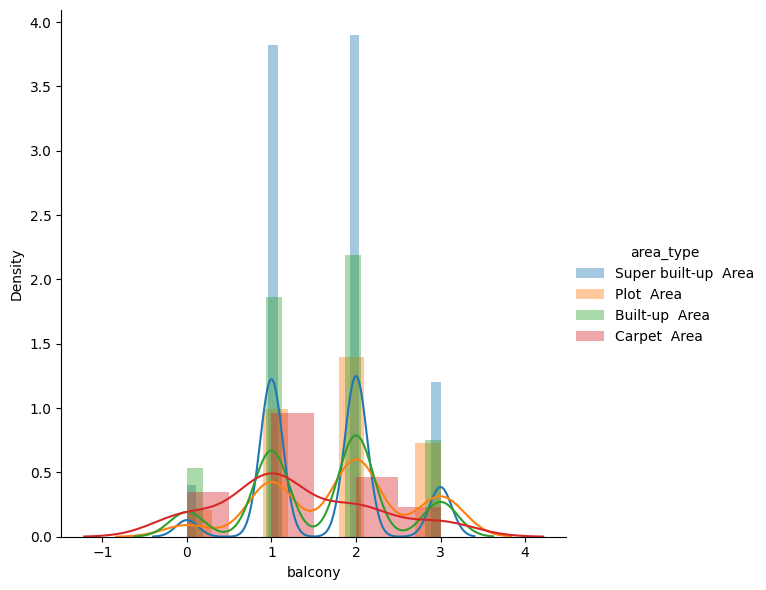

In [67]:
# Create a FacetGrid to visualize the distribution of 'balcony' based on 'area_type'
sns.FacetGrid(home, hue='area_type', height=6).map(sns.distplot, 'balcony').add_legend()

# Display the plot
plt.show()

# 12. Extracting and Converting the bhk Feature

In [68]:
# Extract the number of bedrooms (BHK) from the 'size' column and create a new 'bhk' column
home['bhk'] = home['size'].str.split().str[0]

# Drop any missing values in the 'bhk' column
home['bhk'].dropna(inplace=True)

# Convert the 'bhk' column to integer type
home['bhk'] = home['bhk'].astype('int')

# 13. Visualizing the Distribution of bhk (Number of Bedrooms)

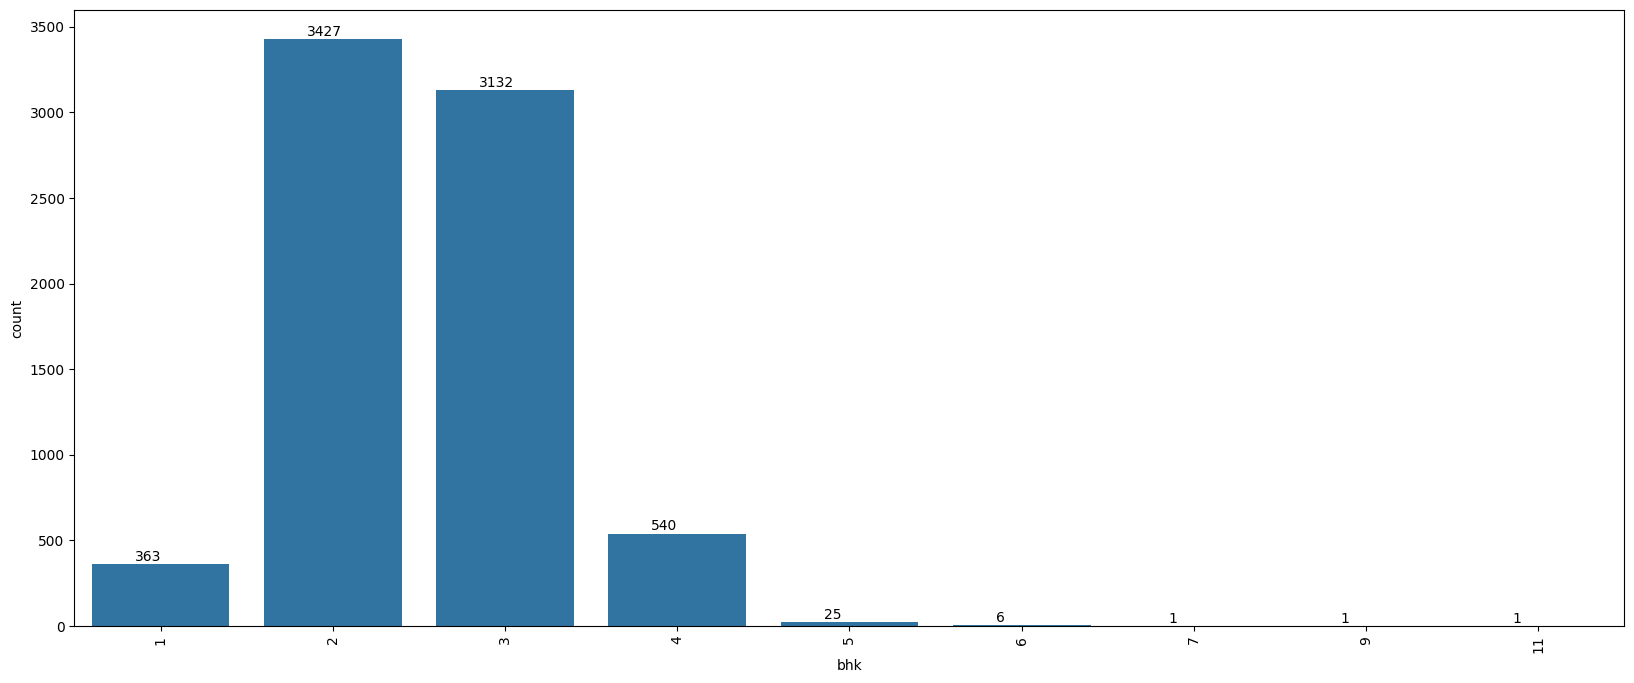

In [69]:
# Set the figure size for the plot
plt.figure(figsize=(20,8))

# Create a count plot to visualize the distribution of 'bhk'
ax = sns.countplot(x='bhk', data=home)

# Rotate the x-axis labels for better readability
plt.xticks(rotation=90)

# Annotate each bar with the count value
for p in ax.patches:
    ax.annotate(
        int(p.get_height()),  # Display the count on top of the bar
        (p.get_x() + 0.25, p.get_height() + 1),  # Position the label above the bar
        va='bottom',  # Align the label at the bottom of the annotation
        color='black'  # Set the label color to black
    )

# Display the plot
plt.show()

# 14. Boxplot of price vs bhk (Number of Bedrooms)

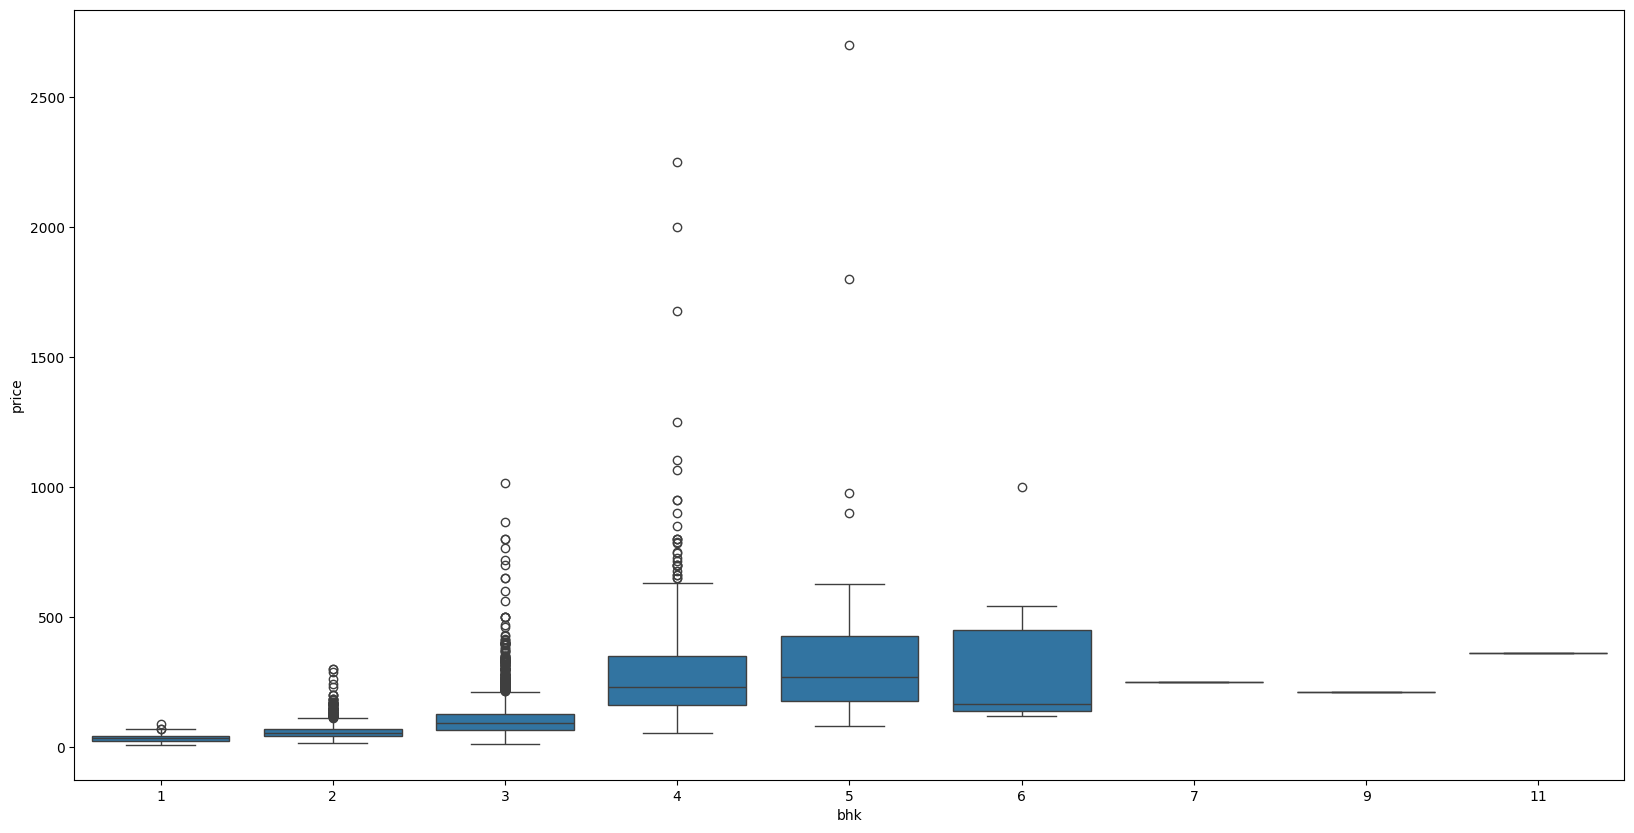

In [70]:
# Create a boxplot to visualize the distribution of 'price' based on 'bhk' (number of bedrooms)
sns.boxplot(x='bhk', y='price', data=home)

# Display the plot
plt.show()

# 15. Inspecting and Converting total_sqft

In [71]:
# Inspect the value at index 17 in the 'total_sqft' column
print(home['total_sqft'].iloc[[17]])

# Function to convert 'total_sqft' values into numeric form
def convert_sqft_to_num(x):
    # If the value has a range (e.g., "1200-1300"), calculate the average
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0]) + float(tokens[1])) / 2
    
    # If it's a single value, return it as a float
    try:
        return float(x)
    except:
        return None  # Return None if the value is not a valid number

17    2100 - 2850
Name: total_sqft, dtype: object


# 16. Converting and Cleaning total_sqft Data

In [72]:
# Apply the conversion function to the entire 'total_sqft' column
home.total_sqft = home.total_sqft.apply(convert_sqft_to_num)

# Remove rows where 'total_sqft' is null (None or missing)
home = home[home.total_sqft.notnull()]

# Display the first two rows of the cleaned dataset
home.head(2)

,area_type,availability,location,size,total_sqft,bath,balcony,price,bhk
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4


# 17. Filtering Out Properties with Unrealistic total_sqft to bhk Ratios

In [73]:
# Filter out properties where the ratio of 'total_sqft' to 'bhk' is less than 200
home = home[~(home.total_sqft / home.bhk < 200)]

# Display the shape of the filtered dataset (number of rows and columns)
home.shape

(7478, 9)

# 18. Separating Numerical and Categorical Columns

In [74]:
# Select all numerical columns (excluding object types like strings)
cont_ = home.select_dtypes(exclude='object')

# Select all categorical columns (those with object type like strings)
cat_ = home.select_dtypes(include='object')

# 19. Boxplots for Numerical Features

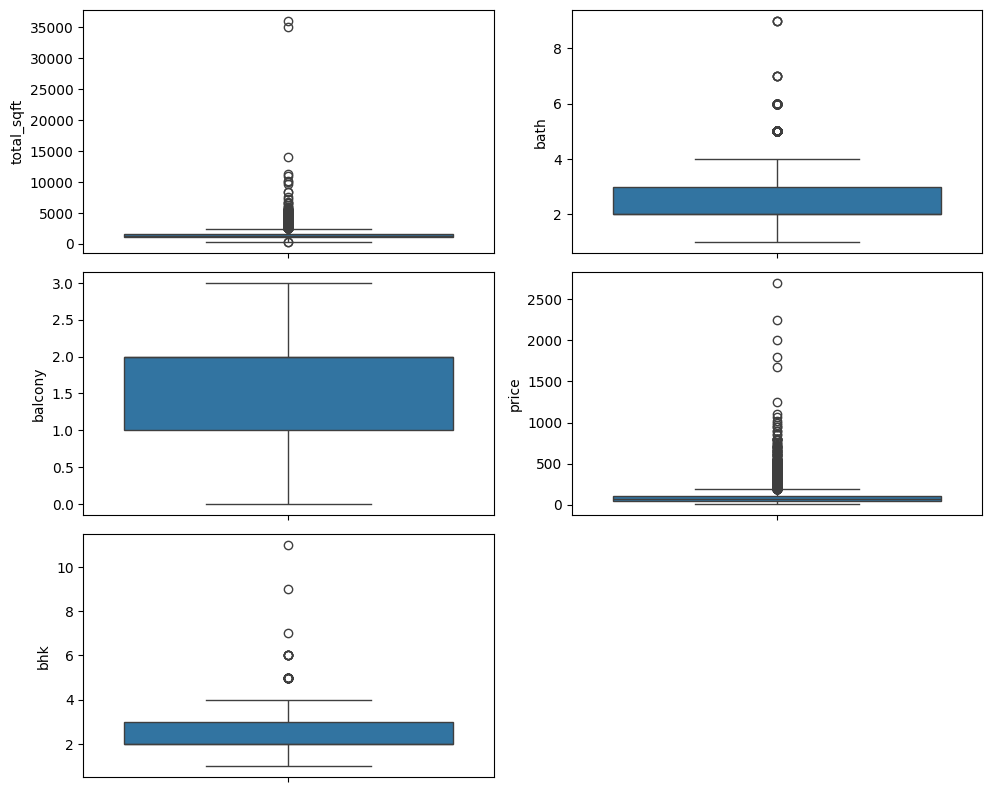

In [75]:
# Set the figure size for the plot
fig = plt.figure(figsize=(10,8))

# Loop through each numerical column to create a boxplot
for index, col in enumerate(cont_):
    # Create a subplot for each column
    plt.subplot(3, 2, index + 1)
    
    # Create a boxplot for the current column
    sns.boxplot(y=cont_.loc[:, col])

# Adjust the layout for better spacing between subplots
fig.tight_layout(pad=1.0)

# 20. Removing Outliers for bath and bhk

In [76]:
# Remove rows where the 'bath' value is greater than 6 (outlier threshold)
home = home.drop(home[home['bath'] > 6].index)

# Remove rows where the 'bhk' value is greater than 7 (outlier threshold)
home = home.drop(home[home['bhk'] > 7.0].index)

# 21. Calculating price_per_sqft

In [77]:
# Calculate the price per square foot and create a new column 'price_per_sqft'
home['price_per_sqft'] = home['price'] * 100000 / home['total_sqft']

# Display the first few rows of the updated DataFrame
home.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2,3699.810606
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4,4615.384615
2,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3,6245.890861
3,Super built-up Area,Ready To Move,Whitefield,2 BHK,1170.0,2.0,1.0,38.00,2,3247.863248
4,Plot Area,Ready To Move,Whitefield,4 Bedroom,2785.0,5.0,3.0,295.00,4,10592.459605


# 22. Removing Outliers Based on price_per_sqft by Location

In [78]:
# Function to remove outliers in 'price_per_sqft' by location
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        # Calculate the mean and standard deviation of 'price_per_sqft' for each location
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        
        # Filter out rows where 'price_per_sqft' is outside the range (mean - std) to (mean + std)
        reduced_df = subdf[(subdf.price_per_sqft > (m - st)) & (subdf.price_per_sqft <= (m + st))]
        
        # Concatenate the filtered data back into the output DataFrame
        df_out = pd.concat([df_out, reduced_df], ignore_index=True)
    
    return df_out

# Apply the function to remove outliers based on 'price_per_sqft'
home = remove_pps_outliers(home)

# Display the shape of the DataFrame after removing outliers
home.shape

(5389, 10)

# 23. Correlation Heatmap (Masked for Correlations Below 0.8)

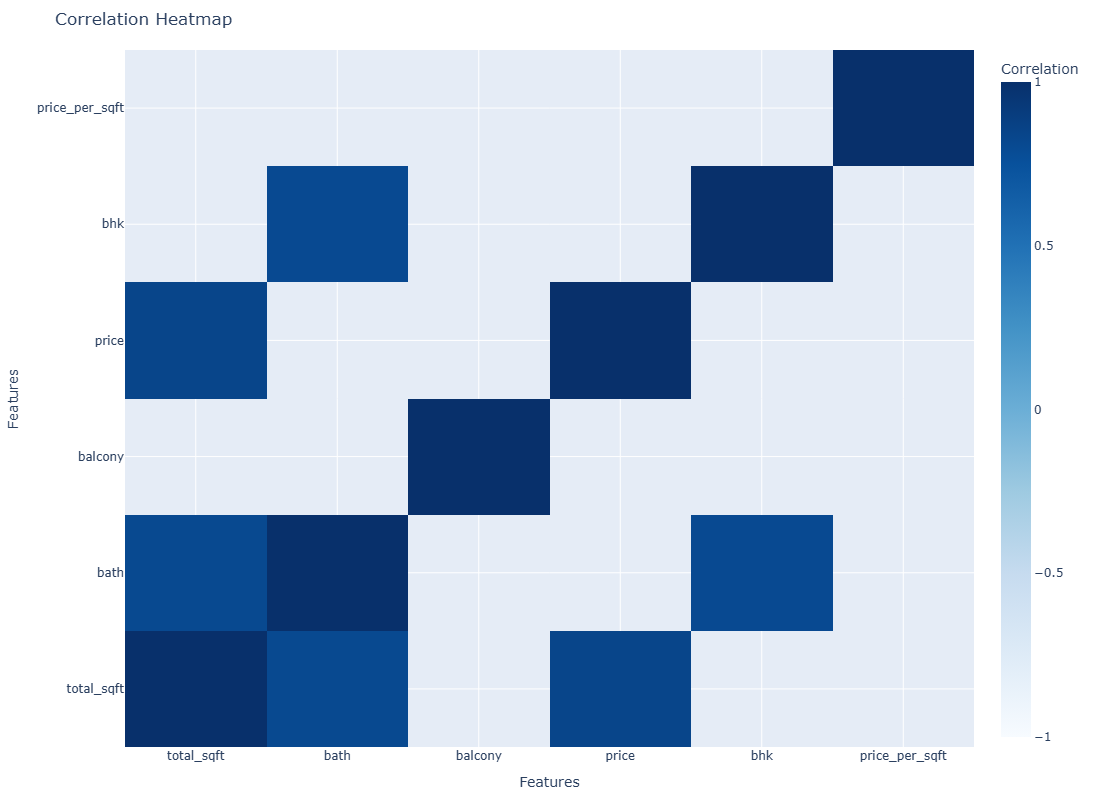

In [79]:
# Import plotly for creating an interactive heatmap
import plotly.graph_objects as go

# Calculate the correlation matrix for numerical columns
corr = home.corr(numeric_only=True)

# Masking correlations less than 0.8 to focus on stronger correlations
mask = corr < 0.8
corr_masked = corr.copy()
corr_masked[mask] = np.nan

# Create a Heatmap using Plotly
fig = go.Figure(data=go.Heatmap(
    z=corr_masked.values,       # Correlation values
    x=corr_masked.columns,      # X-axis (features)
    y=corr_masked.columns,      # Y-axis (features)
    colorscale='Blues',         # Color scale for heatmap
    zmin=-1, zmax=1,            # Set range of correlation values (-1 to 1)
    colorbar=dict(title='Correlation'),  # Title for the color bar
    showscale=True              # Show color scale
))

# Update layout settings for better visualization
fig.update_layout(
    title='Correlation Heatmap',  # Title of the heatmap
    xaxis_title='Features',       # X-axis label
    yaxis_title='Features',       # Y-axis label
    xaxis=dict(tickvals=list(corr_masked.columns), ticktext=list(corr_masked.columns)),
    yaxis=dict(tickvals=list(corr_masked.columns), ticktext=list(corr_masked.columns)),
    height=800,                   # Adjust height for better fit
    width=800,                    # Adjust width for better fit
    margin=dict(l=50, r=50, t=50, b=50)  # Adjust margins
)

# Display the interactive heatmap
fig.show()

# 24. Dropping Irrelevant Columns

In [80]:
# Drop columns that are no longer needed for the analysis or model building
home.drop(columns=['availability', 'size', 'area_type'], inplace=True)

# 25. Cleaning and Analyzing location Column

In [81]:
# Remove any leading or trailing spaces from the 'location' column
home.location = home.location.str.strip()

# Get the value counts of unique locations in the 'location' column
location_stats = home['location'].value_counts(ascending=False)

# Display the location statistics
location_stats

location
Whitefield                  357
Sarjapur  Road              240
Electronic City             225
Kanakpura Road              157
Yelahanka                   141
                           ... 
Chikka Banaswadi              1
Sanne Amanikere               1
Sai Gardens                   1
Chikku Lakshmaiah Layout      1
Kammagondahalli               1
Name: count, Length: 430, dtype: int64

# 26. Filtering Locations with Less Than 10 Properties

In [82]:
# Filter the location statistics to find locations with 10 or fewer properties
location_stats_less_than_10 = location_stats[location_stats <= 10]

# Display the locations with less than or equal to 10 properties
location_stats_less_than_10

location
Neeladri Nagar              10
Munnekollal                 10
Kannamangala                10
Gubbalala                   10
Anandapura                  10
                            ..
Chikka Banaswadi             1
Sanne Amanikere              1
Sai Gardens                  1
Chikku Lakshmaiah Layout     1
Kammagondahalli              1
Name: count, Length: 319, dtype: int64

# 27. Merging Rare Locations and Removing Them

In [83]:
# Replace locations with fewer than or equal to 10 properties with 'other'
home.location = home.location.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)

# Remove all rows where the location is 'other'
home = home[home.location != 'other']

# 28. Removing Outliers Based on bath and bhk Relationship

In [84]:
# Remove rows where the number of bathrooms is greater than the number of bedrooms + 2
home = home[home.bath < home.bhk + 2]

# 29. Visualizing the Distribution of Numerical Features

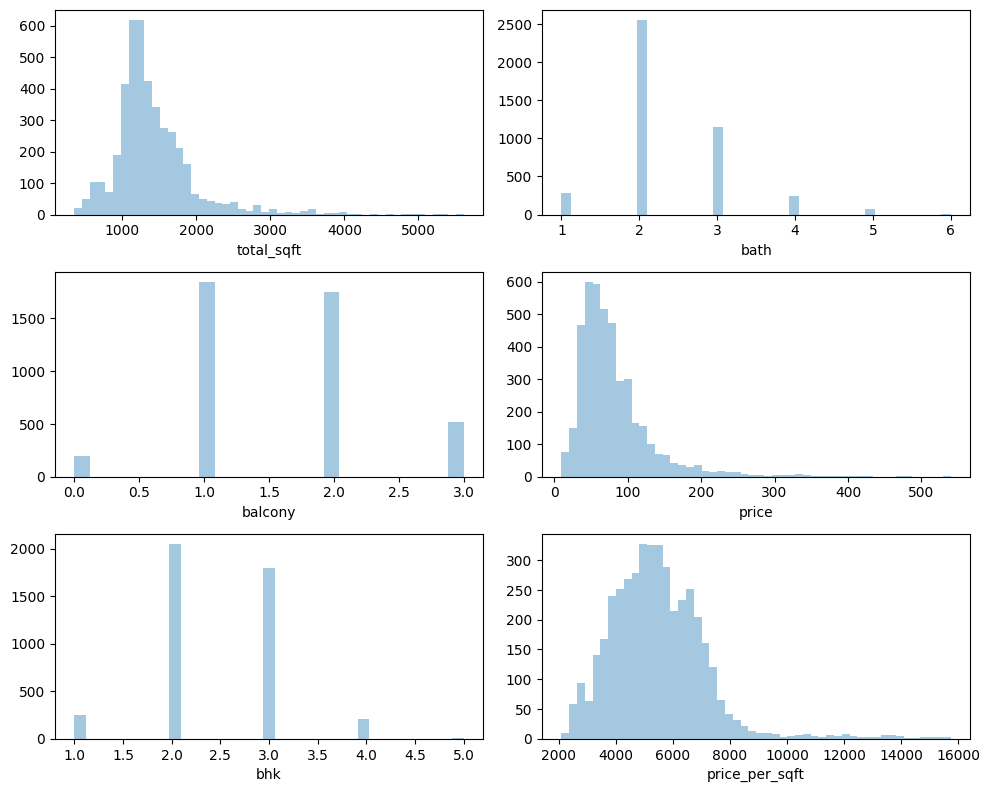

In [85]:
# Select all numerical columns from the DataFrame
num_ = home.select_dtypes(exclude='object')

# Create subplots to visualize the distribution of each numerical feature
fig = plt.figure(figsize=(10, 8))

# Loop through each numerical column and create a subplot for each
for index, col in enumerate(num_):
    plt.subplot(3, 2, index + 1)  # Create subplots in a grid (3 rows, 2 columns)
    sns.distplot(num_.loc[:, col], kde=False)  # Plot histogram for each numerical column

# Adjust the layout to prevent overlap of the plots
fig.tight_layout(pad=1.0)

# 30. One-Hot Encoding of location Column

In [86]:
# Perform one-hot encoding on the 'location' column
dummies = pd.get_dummies(home.location)

# 31. Merging One-Hot Encoded Columns and Dropping Unnecessary Columns

In [87]:
# Concatenate the one-hot encoded columns with the original dataset
home = pd.concat([home, dummies], axis='columns')

# Drop the original 'location' column as it's now encoded
home1 = home.drop('location', axis=1)

# Drop 'balcony' and 'price_per_sqft' columns as they are no longer needed for modeling
home1 = home1.drop(columns=['balcony', 'price_per_sqft'])

# 32. Resetting the Index of the DataFrame

In [88]:
# Reset the index of the DataFrame and drop the old index
home1.reset_index(drop=True, inplace=True)

# 33. Splitting Features and Target Variables

In [89]:
# Define the features (X) by dropping the 'price' column
X = home1.drop('price', axis=1).values

# Define the target variable (y) as the 'price' column
y = home1.price.values

# 34. Reshaping the Target Variable (y)

In [90]:
# Reshape the target variable (y) to ensure it has the correct shape for model training
y = y[:, np.newaxis]

# 35. Standardizing the Features

In [91]:
from sklearn import preprocessing

# Initialize the StandardScaler for feature scaling
sc = preprocessing.StandardScaler()

# Apply StandardScaler to standardize the features (X)
X1 = sc.fit_transform(X)

# 36. Another Way to Standardize the Features

In [92]:
# Apply another method to standardize the features (X)
Std_x1 = preprocessing.scale(X)

# 37. Importing Required Libraries for Cross-Validation and Linear Regression

In [93]:
# Import necessary modules for cross-validation and linear regression
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.linear_model import LinearRegression
lr = LinearRegression()  # Initialize a Linear Regression model
from sklearn.model_selection import cross_validate as CV

# 38. Performing Cross-Validation and Evaluating Model Performance

In [94]:
# Perform cross-validation with 5 folds and calculate the negative mean squared error
cross1 = cross_val_score(lr, Std_x1, y, cv=5, scoring='neg_mean_squared_error')

# Print the mean of the negative mean squared error scores
print(cross1.mean())

-2.7345817173749555e+30


# 39. Splitting the Data into Training and Testing Sets

In [95]:
# Split the data into training and testing sets (30% for testing)
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.3, random_state=10)

In [96]:
X_train.shape

(3012, 114)

# 40. Importing Additional Models and Evaluation Metrics

In [40]:
# Importing regression models and evaluation metrics
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 41. Defining a List of Models for Evaluation

In [41]:
# List of models to evaluate
models = [
    LinearRegression(),
    Ridge(),
    Lasso(alpha=1.0),
    ElasticNet(),
    DecisionTreeRegressor(),
    RandomForestRegressor(),
    GradientBoostingRegressor(),
]

# 42. Training Models and Evaluating Performance

In [57]:
# Initialize lists to store model names and evaluation metrics
model_names = []
mae_Accuracy = []
mse_Accuracy = []
r2_Accuracy = []
import joblib 
# Loop through each model in the models list
for algo in models:
    # Train the model on the training data
    algo.fit(X_train, y_train)
    
    # Make predictions using the test data
    y_pred = algo.predict(X_test)
    
    # Calculate evaluation metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    joblib.dump(algo, f"{model_name}.pkl")
    
    # Append the results to the respective lists
    model_names.append(algo.__class__.__name__)
    mae_Accuracy.append(mae)
    mse_Accuracy.append(mse)
    r2_Accuracy.append(r2)

# 43. Creating a DataFrame to Store Model Evaluation Results

In [43]:
# Create a DataFrame to store model names and their corresponding evaluation metrics
model_df = pd.DataFrame({
    'Model': model_names,
    'mae_Accuracy': mae_Accuracy,
    'mse_Accuracy': mse_Accuracy,
    'r2_Accuracy': r2_Accuracy,
})

# 44. Sorting the Model Results by R² Score

In [44]:
# Sort the DataFrame by R² accuracy in descending order to see the best-performing models
model_df.sort_values(by='r2_Accuracy', ascending=False)

,Model,mae_Accuracy,mse_Accuracy,r2_Accuracy
5,RandomForestRegressor,9.124345,221.866915,0.904751
1,Ridge,10.355644,235.393186,0.898945
0,LinearRegression,10.353813,235.453443,0.898919
6,GradientBoostingRegressor,11.753742,263.558744,0.886853
2,Lasso,12.546938,288.335751,0.876216
4,DecisionTreeRegressor,10.229655,329.731549,0.858445
3,ElasticNet,13.668323,382.488912,0.835796


In [53]:
print(X_train.shape)  # This will show the shape (number of rows, number of columns)

(3012, 114)
